In [1]:
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression


In [2]:
quandl.ApiConfig.api_key = 'sTpTnzPgR8C8piyNDVnA'


df = quandl.get("WIKI/AMZN")
df = df[['Adj. Close']]
df

,Adj. Close
Date,
1997-05-16,1.729167
1997-05-19,1.708333
1997-05-20,1.635833
1997-05-21,1.427500
1997-05-22,1.395833
...,...
2018-03-21,1581.860000
2018-03-22,1544.100000
2018-03-23,1495.560000


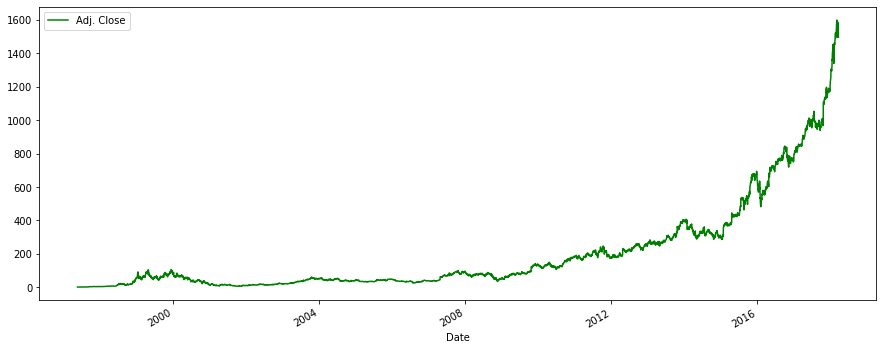

In [3]:
df['Adj. Close'].plot(figsize=(15,6), color='g')
plt.legend(loc='upper left')
plt.show()

In [4]:
forecast =30
df["Prediction"] = df[['Adj. Close']].shift(-forecast)

X = np.array(df.drop(['Prediction'], 1))
X = preprocessing.scale(X)

X_forecast = X[-forecast:]
X = X[:-forecast]

y = np.array(df['Prediction'])
y = y[:-forecast]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearRegression()
clf.fit(X_train, y_train)

confidence = clf.score(X_test, y_test)

forecast_predicted = clf.predict(X_forecast)
print(forecast_predicted)

[1500.52530313 1539.36829981 1550.75331607 1536.85955673 1557.75866222
 1573.24696166 1575.20293084 1591.40345819 1614.7368949  1604.13851841
 1604.63814097 1584.44063312 1591.66921488 1616.50151927 1631.41578427
 1639.239661   1646.53202436 1675.26563685 1695.99465806 1685.14115516
 1688.13889054 1678.91181853 1667.60121413 1639.16524913 1683.36590052
 1678.42282623 1638.28293694 1586.68361952 1650.78413128 1588.26752934]


(17282.0, 18029.5)

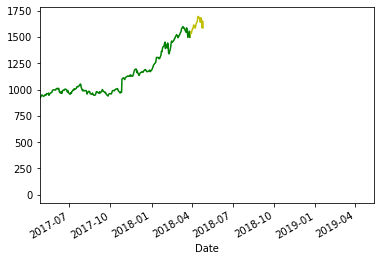

In [6]:
dates = pd.date_range(start="2018-03-28", end="2018-04-26")
plt.plot(dates, forecast_predicted, color='y')
df['Adj. Close'].plot(color='g')
plt.xlim(xmin=datetime.date(2017,4,26))